# Simple Linear Regression


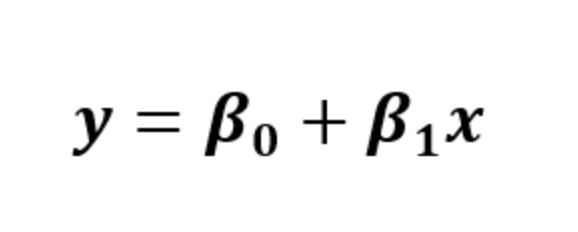

There are 4 assumptions associated with a linear regression model:

1. Linearity: The relationship between independent variables and the mean of the dependent variable is linear.

2. Homoscedasticity: The variance of residuals should be equal.

3. Independence: Observations are independent of each other.

4. Normality: For any fixed value of an independent variable, the dependent variable is normally distributed.

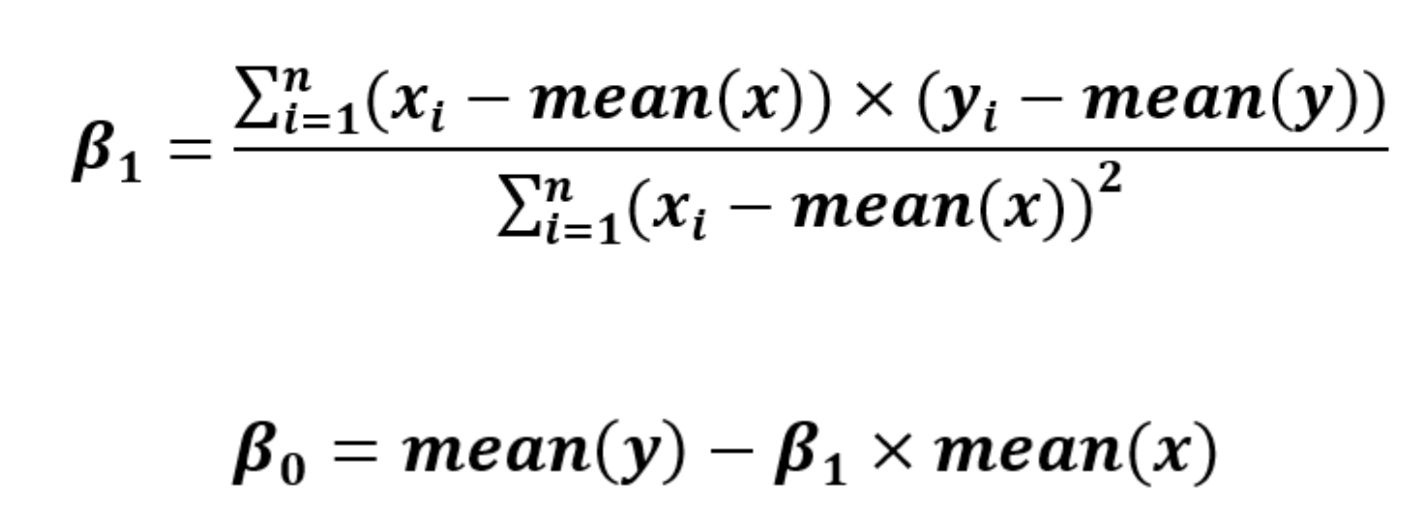

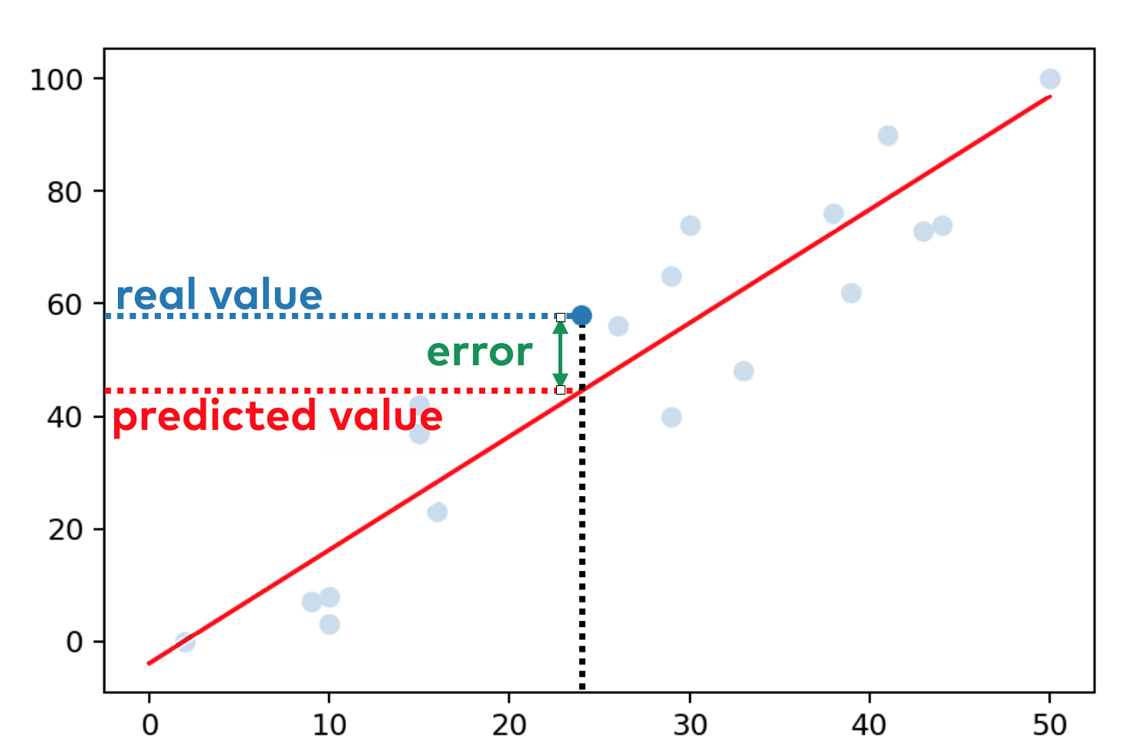

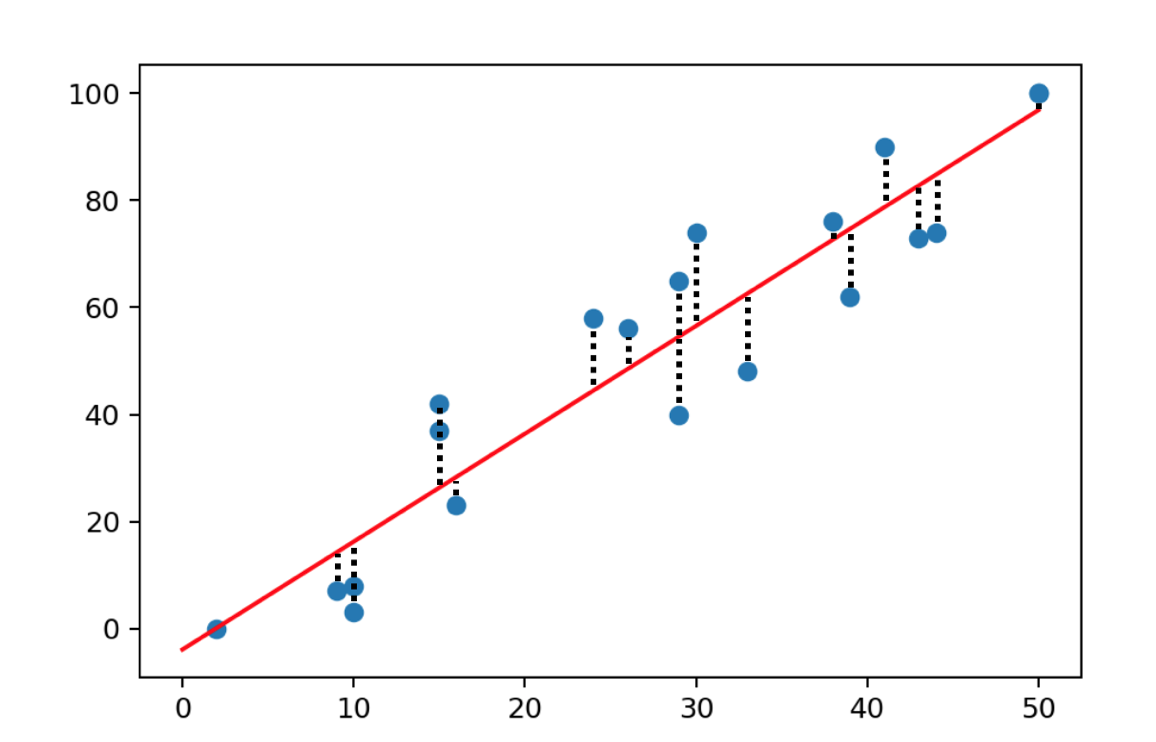

B0 - intercept, B1 - slope

Q1: Мы предполагаем, что существует взаимосвязь между количеством часов, потраченных студентом на обучение, и результатами теста. Чем больше студент занимается, тем лучше результат теста будет. Посмотрим, так ли это.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}

student_data = pd.DataFrame(data=students)

In [3]:
student_data

,hours,test_results
0,29,65
1,9,7
2,10,8
3,38,76
4,16,23
5,26,56
6,50,100
7,10,3
8,30,74
9,33,48


In [4]:
x = student_data.hours #Independent variable (X) - hours
y = student_data.test_results #Dependent variable (Y) - test results

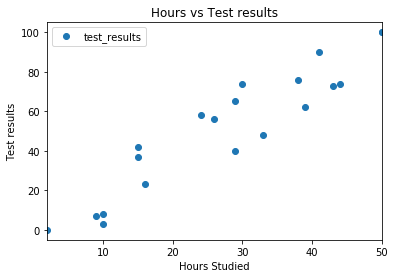

In [5]:
student_data.plot(x='hours', y='test_results', style='o')
plt.title('Hours vs Test results')
plt.xlabel('Hours Studied')
plt.ylabel('Test results')
plt.show()

По графику видно, что существуют линейная зависимость, теперь надо проверить это. Сначала находим по формулам slope и intercept

In [6]:
slope = np.sum((x - np.mean(x))*(y - np.mean(y)))/(np.sum((x-np.mean(x)) ** 2))
slope

2.0146748714407274

В среднем, при увеличение количества часов, потраченных на обучение на 1 час, показатель результата теста увеличится на 2 балла.

In [7]:
intercept = np.mean(y) - slope*np.mean(x)
intercept

-3.9057601953361143

В среднем, когда студент вообще не занимался, результат его теста будет -3,9 балла.

Создаем функцию для Simple Regression model

In [8]:
def simplelinearmodel(x):
    return intercept+slope*x
y_predicted = simplelinearmodel(x)

In [9]:
y_predicted #Значения результатов тестов, которые предсказала наша модель для каждого значения X.

0     54.519811
1     14.226314
2     16.240989
3     72.651885
4     28.329038
5     48.475786
6     96.827983
7     16.240989
8     56.534486
9     62.578511
10    82.725259
11     0.123590
12    74.666560
13    26.314363
14    84.739934
15    54.519811
16    78.695910
17    26.314363
18    44.446437
19    96.827983
Name: hours, dtype: float64

In [10]:
data = {'hours': x, 'predicted_test_results': y_predicted,
        'real_test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}
student_data = pd.DataFrame(data=data)
student_data

,hours,predicted_test_results,real_test_results
0,29,54.519811,65
1,9,14.226314,7
2,10,16.240989,8
3,38,72.651885,76
4,16,28.329038,23
5,26,48.475786,56
6,50,96.827983,100
7,10,16.240989,3
8,30,56.534486,74
9,33,62.578511,48


Используем теперь библиотеки:

In [11]:
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=2.014674871440727, intercept=-3.9057601953361, rvalue=0.9368820730704813, pvalue=1.1992631534960475e-09, stderr=0.17721959553200506)

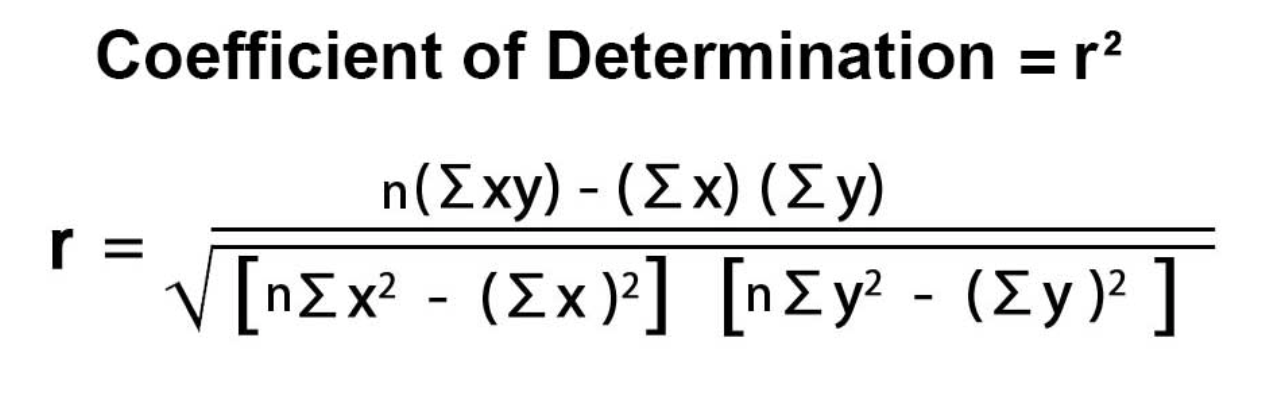

In [12]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.8777480188408424

87% вариаций в результатах теста, в среднем, объясняется вариациями в количестве часов, потраченных на обучение

Q2: Мы предполагаем, что есть линейная взаимосвязь между ценой дома и жилой площадью. Чем больше площадь, тем дороже дом. У нас есть датасет с данными, нужно его загрузить и проанализировать.

In [13]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Строим график для значений цены и площади:

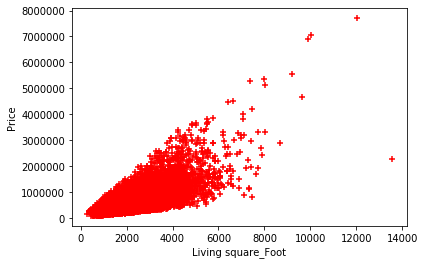

In [16]:
plt.xlabel('Living square_Foot')
plt.ylabel('Price')
plt.scatter(df.sqft_living,df.price,color='red',marker='+')

По графику видно, что мы можем предположить, что существует линейная связь между жилой площадью и ценой.

In [17]:
price = df.price
price.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [18]:
square = df[['sqft_living']]
square.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


# Наше уравнение принимает следующий вид: 
Price = intercept + slope * Square

In [19]:
regression_model = linear_model.LinearRegression()
regression_model.fit(square, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
slope = regression_model.coef_
slope

array([280.80668993])

В среднем, при увеличении площади на 1 единицу (фут), цена дома увеличивается на $280.

In [21]:
intercept = regression_model.intercept_
intercept

-43867.60153385578

В среднем, в случае, когда площадь равна 0, цена дома будет -43867.60153385578.

Мы присмотрели дом, у которого жилая площадь равно 3000 футов. Используя нашу линейную модель регрессии, мы можем предсказать цену этого дома.

In [22]:
y_predicted_sample = regression_model.predict([[3000]])
y_predicted_sample

array([798552.46825465])

Подставив в уравнение вручную: Price = (43867.60153385578) + 280.80668993 * Area

In [23]:
(-43867.60153385578) + 280.80668993*3000

798552.4682561442

In [24]:
price_predicted = regression_model.predict(square)
price_predicted

array([287484.29258296, 677805.59158496, 172353.54971186, ...,
       242555.22219424, 405423.10235335, 242555.22219424])

In [25]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n', regression_model.coef_)
print()
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(price, price_predicted))

Coefficients: 
 [280.80668993]

Coefficient of determination: 0.49


49% вариаций в цене дома объясняется вариациями в площади. Это плохой результат, можно сказать, что размер площади объясняет цену только в 50% случаев. Можно отбросить этот фактор и построить модель для другого.

In [26]:
from sklearn.metrics import r2_score
r2_score(price, price_predicted)

0.49286538652201417

Можем построить прямую на графике:

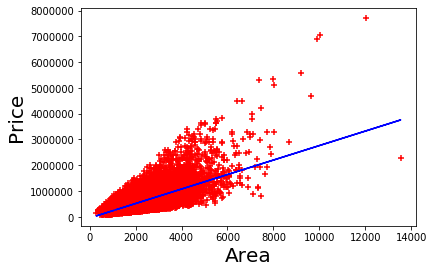

In [27]:
plt.xlabel('Area', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.scatter(df.sqft_living,df.price,color='red',marker='+')
plt.plot(df.sqft_living,regression_model.predict(df[['sqft_living']]),color='blue')

Используем другую библиотеку:

In [28]:
import statsmodels.api as sm
square = sm.add_constant(square) # adding a constant
 
model = sm.OLS(price, square).fit()
predictions = model.predict(square) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:37:54   Log-Likelihood:            -3.0028e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.387e+04   4405.455     -9.958      

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Multiple linear regression model

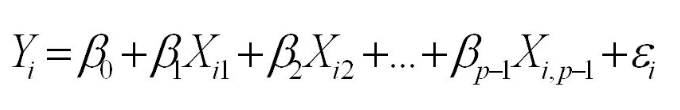

In [29]:
from pandas import DataFrame
import statsmodels.api as sm

Q3: Рассматриваем линейную зависимость между Stock Price Index (индекс цены на акции - dependent variable) и Unemployment Rate (уровень безработицы), Interest Rate (процент вознаграждения) (both are independent variables). 

In [30]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df2 = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

In [31]:
df2.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


Рассматриваем линейную зависимость между Stock Price Index (индекс цены на акции - dependent variable) и Unemployment Rate (уровень безработицы), Interest Rate (процент вознаграждения) (both are independent variables). 

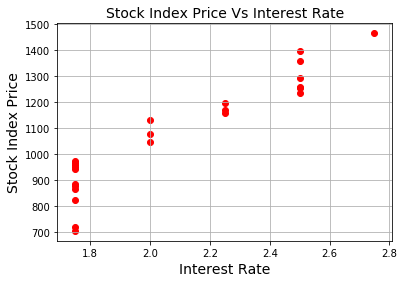

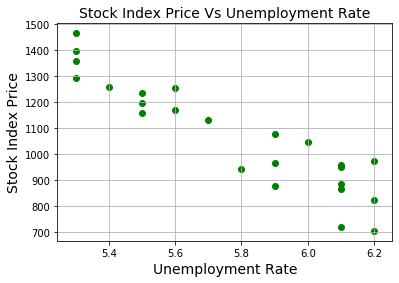

In [32]:
plt.scatter(df2['Interest_Rate'], df2['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df2['Unemployment_Rate'], df2['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

Видно, что у Stock Price Index и Interest Rate положительная линейная зависимость. Чем больше процент вознаграждения, тем больше людей покупают акции, тем они дороже.
Видно, что у Stock Price Index и Unemployment Rate отрицательная линейная зависимость. Чем выше уровень безработицы, тем меньше людей покупают акции, так как у них нет доходов,им нужны деньги в силу отсутствия работы.

In [33]:
X = df2[['Interest_Rate','Unemployment_Rate']]
Y = df2['Stock_Index_Price']

In [34]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print()
print('Это значит, что в среднем, когда обе независимые переменные равны 0, индекс на цену акции будет равен', regr.intercept_)
print()
print('Coefficients: \n', regr.coef_)
print()
print('Это значит, что в среднем, когда процент вознаграждения увеличится на 1 процент, индекс на цену акции увеличится на 345.\n  ')
print('В среднем, когда же уровень безработицы увеличится на 1 единицу, индекс на цену акции уменьшится на 250.')

Intercept: 
 1798.403977625855

Это значит, что в среднем, когда обе независимые переменные равны 0, индекс на цену акции будет равен 1798.403977625855

Coefficients: 
 [ 345.54008701 -250.14657137]

Это значит, что в среднем, когда процент вознаграждения увеличится на 1 процент, индекс на цену акции увеличится на 345.
  
В среднем, когда же уровень безработицы увеличится на 1 единицу, индекс на цену акции уменьшится на 250.


In [35]:
# Рассматриваем, какой индекс цены на акции покажет нам модель в следующем случае:
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

Predicted Stock Index Price: 
 [1422.86238865]


In [36]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           4.04e-11
Time:                        18:37:55   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Logistic regression

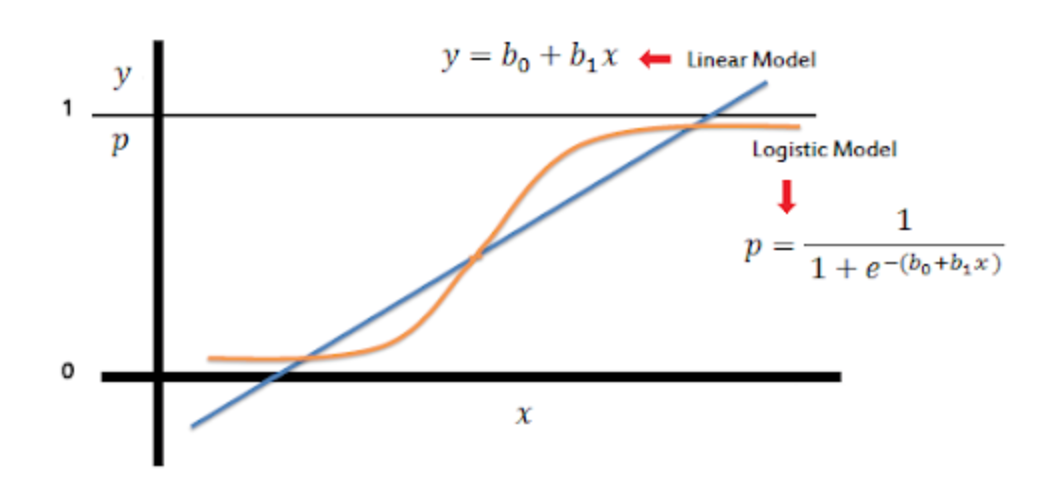

Logistic Regression is a classification algorithm which is used when we want to predict a categorical variable (Yes/No, Pass/Fail) based on a set of independent variable(s).

Assumptions: 

1. The dependent variable must be categorical
2. The independent variables(features) must be independent (to avoid multicollinearity).

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Используем датасет с данными о пассажирах с Титаника. Для начала надо его загрузить:

In [38]:
titanic_df = pd.read_csv("titanic_dataset.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Можно построить график, который будет отображать количество выживших и погибших в разрезе пола:

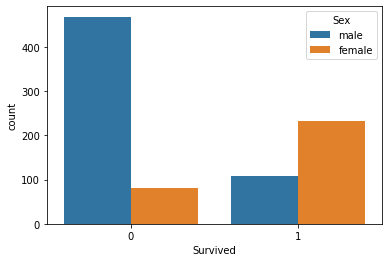

In [40]:
sns.countplot(x='Survived', hue='Sex', data=titanic_df)

Видно, что среди выживших женщин в два раза больше чем мужчин. Среди погибших много мучжин. Скорее всего? эвакуировали детей и женщин. Статистика это подтверждает.

Можно построить boxplots, которые будет отображать возраст в разрезе погибший/выживший:

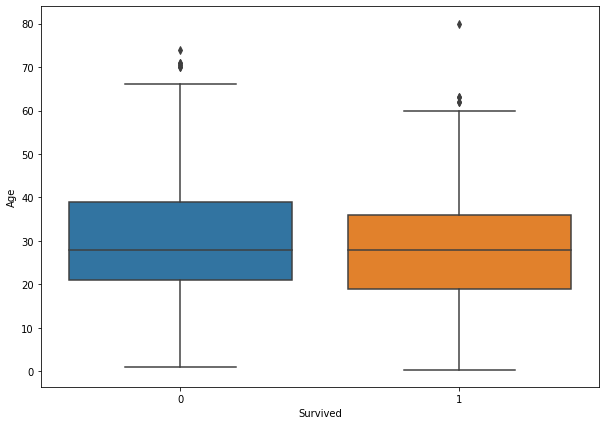

In [41]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Survived',y='Age',data=titanic_df)

Построим simple logistic regression model для того, чтобы найти есть ли взаимосвязь между стоимостью билета и статусом "survived/not survived". Богатые люди могли себе позволить каюты ближе к верхней палубе, поэтому им легче было выбраться, соответственно, и шансов выжить у них было больше.

In [42]:
X = titanic_df[["Fare"]]
Y = titanic_df["Survived"]

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, Y)
survival_status = model.predict(X)
accuracy = accuracy_score(Y,survival_status)
slope = model.coef_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
print(slope)

[[0.01506685]]


Когда стоимость билета увеличится на $1, вероятность того, что человек выживет, увеличится на 2%. 

In [45]:
accuracy 

0.6655443322109988

Показывает насколько хорошо наша модель определила пассажиров в правильную группу. Чем коэффициент лучше, тем модель лучше. В нашем случае, Accuracy 67%, то есть из 891 пассажира, она правильно определила статус "выживший/погибший" на основе стоимости билета для 67%.

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, survival_status)
print(confusion_matrix)

[[511  38]
 [260  82]]


True 1 - это группа выживших в реальности
True 0 - это группа погибших в реальности
Predicted 1 - это группа выживших, предсказанных нашей моделью
Predicted 0 - это группа погибших, предсказанных нашей моделью

Результат говорит, что модель правильно предсказала 511+82, и неправильно 38+260. 

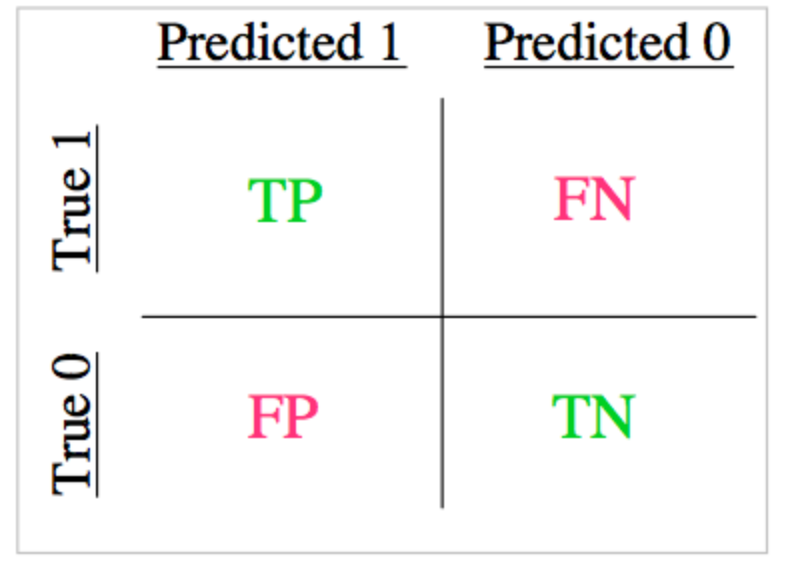